In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

import networkx as nx
from networkx.algorithms.clique import *

from networkx.algorithms.components import *

import xml.dom.minidom
import xml.etree.ElementTree as et 
import pandas as pd
import re
# import nltk
# import gensim

import sqlite3 as db
from sqlite3 import Error as DbError
import sys

In [2]:
con = db.connect('database.db')
cursor=con.cursor()

In [3]:
# --------------------------------------------------------
# Create USERS dataframe (SS)
# --------------------------------------------------------

xtree = et.parse("datascience.stackexchange.com/Users.xml")
xroot = xtree.getroot()
columns = ["Id","Reputation","CreationDate","DisplayName","LastAccessDate","Location","Views","UpVotes","DownVotes"]
rows = []

for node in xroot: 
        s_id = node.attrib.get("Id")
        s_rep = node.attrib.get("Reputation")
        s_date = node.attrib.get("CreationDate")
        s_dname = node.attrib.get("DisplayName")
        s_ldate = node.attrib.get("LastAccessDate")
        s_loc = node.attrib.get("Location")
        s_views = node.attrib.get("Views")
        s_uvotes = node.attrib.get("UpVotes")
        s_dvotes = node.attrib.get("DownVotes")
        rows.append({"Id":s_id,"Reputation":s_rep,"CreationDate":s_date,"DisplayName":s_dname,"LastAccessDate":s_ldate,"Location":s_loc,"Views":s_views,"UpVotes":s_uvotes,"DownVotes":s_dvotes})
df_users=pd.DataFrame(rows,columns = columns)
df_users.sort_values(by=['Reputation'], inplace=True, ascending=False)
result=(df_users.head(100))
result

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,Location,Views,UpVotes,DownVotes
18097,26146,992,2016-11-15T14:53:51.860,hh32,2019-08-28T08:41:25.337,Germany,11,29,0
15917,23851,99,2016-08-28T10:28:01.160,yashaka,2016-09-24T14:12:43.780,None,0,1,0
31516,41688,99,2017-11-10T08:23:34.337,NKS,2019-07-22T05:25:02.437,None,1,0,0
18589,26643,99,2016-11-30T10:28:24.143,Torben.,2018-07-13T00:33:25.383,None,9,0,0
63086,76587,99,2019-06-24T15:18:05.253,user2458922,2019-08-22T16:19:33.133,None,0,0,0
...,...,...,...,...,...,...,...,...,...
44377,56760,91,2018-07-26T13:42:57.957,Martin Brišiak,2019-08-05T13:27:01.350,Slovakia,3,1,0
59093,71581,91,2019-04-16T07:41:40.590,Benj,2019-08-30T18:24:59.000,None,11,0,0
25154,33279,91,2017-06-11T16:05:51.827,bacloud14,2019-08-26T20:29:05.540,None,10,6,0
57488,69963,91,2019-03-21T08:02:09.367,Tauno Tanilas,2019-08-14T19:36:53.500,None,6,0,0


In [4]:
# --------------------------------------------------------
# Create USERS table 
# --------------------------------------------------------

df_users.to_sql(name='users', con = con, if_exists='replace',index=False)    

cursor.execute('select * from users')
result = cursor.fetchall()
result

[('26146',
  '992',
  '2016-11-15T14:53:51.860',
  'hh32',
  '2019-08-28T08:41:25.337',
  'Germany',
  '11',
  '29',
  '0'),
 ('23851',
  '99',
  '2016-08-28T10:28:01.160',
  'yashaka',
  '2016-09-24T14:12:43.780',
  None,
  '0',
  '1',
  '0'),
 ('41688',
  '99',
  '2017-11-10T08:23:34.337',
  'NKS',
  '2019-07-22T05:25:02.437',
  None,
  '1',
  '0',
  '0'),
 ('26643',
  '99',
  '2016-11-30T10:28:24.143',
  'Torben.',
  '2018-07-13T00:33:25.383',
  None,
  '9',
  '0',
  '0'),
 ('76587',
  '99',
  '2019-06-24T15:18:05.253',
  'user2458922',
  '2019-08-22T16:19:33.133',
  None,
  '0',
  '0',
  '0'),
 ('27011',
  '99',
  '2016-12-12T15:23:31.970',
  'FuzzyWuzzy',
  '2019-02-20T04:22:35.690',
  None,
  '2',
  '0',
  '0'),
 ('18772',
  '99',
  '2016-05-16T23:22:28.040',
  'Stepan Yakovenko',
  '2019-06-19T09:25:00.747',
  'Novosibirsk, Russia',
  '1',
  '0',
  '0'),
 ('14152',
  '99',
  '2015-11-17T00:53:45.650',
  'Yilun Zhang',
  '2019-08-01T15:25:01.520',
  'Toronto, Canada',
  '8',
  '2

In [5]:
# --------------------------------------------------------
# Create POSTS dataframe (SS)
# --------------------------------------------------------

xtree = et.parse("datascience.stackexchange.com/Posts.xml")
xroot = xtree.getroot()
columns = ["Title","Id","PostTypeId","ParentId","AcceptedAnswerId","Score","OwnerUserId","Year"]
rows = []
for node in xroot: 
        s_title = node.attrib.get("Title")
        s_id = node.attrib.get("Id")
        s_ptypeid = node.attrib.get("PostTypeId")
        s_parentid = node.attrib.get("ParentId")
        s_acceptedId = node.attrib.get("AcceptedAnswerID")
        s_score = node.attrib.get("Score")
        s_ownerId = node.attrib.get("OwnerUserId")
        s_creationDate=node.attrib.get("CreationDate")
        s_year=s_creationDate[0:4]
        rows.append({"Title":s_title,"Id":s_id,"PostTypeId":s_ptypeid,"ParentId":s_parentid,"AcceptedAnswerID":s_acceptedId,
                     "Score":s_score,"OwnerUserId":s_ownerId,"Year":s_year})
df_posts = pd.DataFrame(rows,columns = columns)   
df_posts

,Title,Id,PostTypeId,ParentId,AcceptedAnswerId,Score,OwnerUserId,Year
0,How can I do simple machine learning without h...,5,1,None,NaN,8,5,2014
1,What open-source books (or other materials) pr...,7,1,None,NaN,4,36,2014
2,None,9,2,5,NaN,5,51,2014
3,None,10,2,7,NaN,12,22,2014
4,Is Data Science the Same as Data Mining?,14,1,None,NaN,23,66,2014
...,...,...,...,...,...,...,...,...
39924,None,58482,2,56594,NaN,0,68230,2019
39925,Can I update weights of keras neural net only ...,58483,1,None,NaN,0,58008,2019
39926,How to create dictionaries out of pandas dataf...,58484,1,None,NaN,0,80463,2019
39927,Real Analysis like convergence of loss functions,58485,1,None,NaN,0,59854,2019


In [6]:
# --------------------------------------------------------
# Create POSTS table
# --------------------------------------------------------

df_posts.to_sql(name='posts', con = con, if_exists='replace',index=False)

cursor.execute('select * from posts')
result = cursor.fetchall()

len(result)

39929

In [7]:
# --------------------------------------------------------
# Create COMMENTS dataframe (SS)
# --------------------------------------------------------

xtree = et.parse("datascience.stackexchange.com/Comments.xml")
xroot = xtree.getroot()
columns = ["Id","PostId","Score","Text","CreationDate","UserId","Year"]
rows = []

for node in xroot: 
    s_id = node.attrib.get("Id")
    s_pid = node.attrib.get("PostId")
    s_score = node.attrib.get("Score")
    s_text = node.attrib.get("Text")
    s_cdate = node.attrib.get("CreationDate")
    s_uid = node.attrib.get("UserId")
    s_year=s_cdate[0:4]	
    rows.append({"Id":s_id,"PostId":s_pid,"Score":s_score,"Text":s_text,"CreationDate":s_cdate,"UserId":s_uid,"Year":s_year})
df_comments = pd.DataFrame(rows,columns = columns)   
df_comments

,Id,PostId,Score,Text,CreationDate,UserId,Year
0,5,5,9,this is a super theoretical AI question. An in...,2014-05-14T00:23:15.437,34,2014
1,6,7,4,List questions are usually not suited for Stac...,2014-05-14T00:38:19.510,51,2014
2,9,7,3,This question appears to be off-topic because ...,2014-05-14T01:16:12.623,66,2014
3,12,15,3,This question is far too broad. It may be salv...,2014-05-14T02:00:22.797,51,2014
4,13,10,2,"Nice one, @Nicholas... Another book from Hasti...",2014-05-14T02:16:20.503,24,2014
...,...,...,...,...,...,...,...
41717,64042,58475,0,Why do you think so? How would you even apply ...,2019-08-31T19:59:55.307,924,2019
41718,64043,58478,0,I'm not sure I can understand the question the...,2019-08-31T22:27:59.307,79659,2019
41719,64044,58484,0,I think the problem is that you are giving the...,2019-08-31T23:49:16.323,74421,2019
41720,64046,58484,0,I mean if it's possible to add 2 rows of each ...,2019-09-01T00:03:30.023,74421,2019


In [8]:
# --------------------------------------------------------
# Create COMMENTS table
# --------------------------------------------------------

df_comments.to_sql(name='comments', con = con, if_exists='replace',index=False)

cursor.execute('select * from comments where Id = "5"')
result = cursor.fetchall()
result

[('5',
  '5',
  '9',
  'this is a super theoretical AI question. An interesting discussion! but out of place...',
  '2014-05-14T00:23:15.437',
  '34',
  '2014')]

In [9]:
# --------------------------------------------------------
# Create BADGES dataframe
# --------------------------------------------------------

xtree = et.parse("datascience.stackexchange.com/Badges.xml")
xroot = xtree.getroot()

columns = ["Name","UserId","Date"]
rows = []

for node in xroot: 
    s_name = node.attrib.get("Name")
    s_uid = node.attrib.get("UserId")
    s_date = node.attrib.get("Date")
    rows.append({"Name":s_name,
                 "UserId":s_uid,
                 "Date":s_date})

df_badges = pd.DataFrame(rows,columns = columns)   
df_badges

,Name,UserId,Date
0,Informed,1,2014-05-13T23:06:44.683
1,Autobiographer,2,2014-05-13T23:11:04.153
2,Autobiographer,4,2014-05-13T23:20:53.547
3,Autobiographer,5,2014-05-13T23:20:53.547
4,Autobiographer,8,2014-05-13T23:20:53.547
...,...,...,...
78175,Editor,80463,2019-09-01T00:10:11.977
78176,Autobiographer,80464,2019-09-01T01:10:12.960
78177,Supporter,80464,2019-09-01T01:10:12.960
78178,Yearling,8664,2019-09-01T01:10:12.960


In [10]:
# --------------------------------------------------------
# Create BADGES table
# --------------------------------------------------------
# SQLITE

df_badges.to_sql(name='badges', con = con, if_exists='replace',index=False)

cursor.execute('select * from badges where Name ="Teacher"')
result = cursor.fetchall()
len(result)

3884

In [11]:
# --------------------------------------------------------
# POSTLINKS
# --------------------------------------------------------

xtree = et.parse("datascience.stackexchange.com/PostLinks.xml")
xroot = xtree.getroot()
columns = ["PostId","RelatedPostId","PostLinkTypeId","CreationDate"]
rows = []
for node in xroot: 
        s_pid = node.attrib.get("PostId")
        s_rid = node.attrib.get("RelatedPostId")
        s_ltypeid = node.attrib.get("LinkTypeId")
        s_date = node.attrib.get("CreationDate")
        rows.append({"PostId":s_pid,
                     "RelatedPostId":s_rid,
                     "PostLinkTypeId":s_ltypeid,
                     "CreationDate":s_date})
df_postlinks = pd.DataFrame(rows,columns = columns)   
df_postlinks

,PostId,RelatedPostId,PostLinkTypeId,CreationDate
0,14,1,1,2014-05-14T07:56:34.437
1,75,71,1,2014-05-15T01:46:28.467
2,59,41,1,2014-05-20T17:42:19.287
3,361,61,1,2014-06-13T16:44:29.323
4,61,361,1,2014-06-13T16:58:23.247
...,...,...,...,...
1648,58178,57967,1,2019-08-26T02:31:16.250
1649,52915,55566,3,2019-08-26T12:43:22.467
1650,58275,26009,1,2019-08-27T15:49:13.693
1651,28440,25029,1,2019-08-29T11:38:46.977


In [12]:
# --------------------------------------------------------
# Create POSTSLINKS table
# --------------------------------------------------------

df_postlinks.to_sql(name='postslinks', con = con, if_exists='replace',index=False)

cursor.execute('select * from postslinks')
result = cursor.fetchall()

len(result)

1653

In [13]:
# --------------------------------------------------------
# Define POST class (All attributes)
# --------------------------------------------------------

class Post:
    def __init__(self, id, title=None, PostTypeID=None, ParentID=None, OwnerUserId=None):
        self.title = title
        self.id = id
        self.PostTypeID = PostTypeID
        self.ParentID = ParentID
        self.OwnerUserId = OwnerUserId
        
    def __str__(self):
        return ("%s, %s, %s, %s" % (self.id, self.title, self.PostTypeID, self.ParentID))
    
    def get_id(self):
        return self.id
    
    def __eq__(self, other):
        if self.id == other.get_id():
            return True
        else:
            return False

In [14]:
# --------------------------------------------------------
# Create node list -- List of POST objects
# Format of posts -- Title, Id, PostTypeId, ParentId, AcceptedAnswerId, Score, OwnerUserId, Year
# --------------------------------------------------------

list_of_posts_nodes = []

cursor.execute("select * from posts")
allposts = cursor.fetchall()

for post in allposts:
    if not (post[6] == None): 
        list_of_posts_nodes.append(Post(post[1], post[0], post[2], post[3], post[6]))

len(list_of_posts_nodes)

# for x in list_of_posts_nodes:
#     print(x)

#ASSERT -- list_of_posts_nodes now contains post objects, one for each post. Will be added to graph as nodes

39786

In [15]:
# --------------------------------------------------------
# Create edge list
# --------------------------------------------------------

posts_edge_list = []

cursor.execute('select * from postslinks')
all_postlinks = cursor.fetchall()


for postlink in all_postlinks:
#     print(postlink)
    tup = (int(postlink[0]), int(postlink[1]))
    posts_edge_list.append(tup)
    
print(len(posts_edge_list))

# --------------------------------------------------------
# Used only postlinkis data to this point
# Answers to questions also form links between answer post and question post
# --------------------------------------------------------

for post in allposts:
    if post[2] == '2': # Looking at only answers
#         
        if (not (post[1] == None) and (not post[3] == None)):            
#            
            tup = (int(post[1]), int(post[3]))
            posts_edge_list.append(tup)
        
print(len(posts_edge_list))

1653
22591


In [16]:
# Create dictionary of which {post: creator}

cursor.execute("select * from posts")
allposts = cursor.fetchall()

post_dict = {}

for post in allposts:
    
    if not (post[6] == None):        
        post_dict[int(post[1])] = int(post[6])

In [17]:
# --------------------------------------------------------
# Create graph of posts
# --------------------------------------------------------

G = nx.MultiDiGraph()

print("Number of nodes ----> ", G.order())
print("Number of edges ----> ", G.size())
print(len(list_of_posts_nodes))
print(len(posts_edge_list))

# Add Nodes
for post in list_of_posts_nodes:
    num = int(post.id)    
    G.add_node(num, data=post)

# # Add Edges
for edge in posts_edge_list:
    G.add_edge(edge[0], edge[1])

print("Number of nodes ----> ", G.order())
print("Number of edges ----> ", G.size())

Number of nodes ---->  0
Number of edges ---->  0
39786
22591
Number of nodes ---->  40175
Number of edges ---->  22591


Highest Degrees is ---->  45
Nodes with highest degree ---->  [155]
Postids with highest degrees
Postid | Degree 
----------------------------------
13490 |    15 
  326 |    17 
12851 |    18 
24534 |    18 
 6107 |    19 
15903 |    19 
  694 |    20 
26597 |    29 
   22 |    30 
  155 |    45 


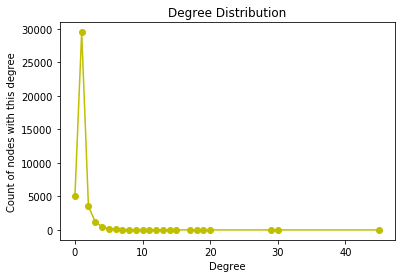

In [18]:
# --------------------------------------------------------
# Degree Distribution of posts graph
# --------------------------------------------------------

degrees = nx.degree(G)

deg_list = [b for (a,b) in degrees]
unique_degrees = list(set(deg_list))
count_degrees = [deg_list.count(a) for a in unique_degrees]
print("Highest Degrees is ----> ", max(unique_degrees))
print("Nodes with highest degree ----> ", [a for (a,b) in degrees if b == max(unique_degrees)])

sorted_degrees = list(degrees)[:]
sorted_degrees.sort(key = lambda x: x[1])

print("Postids with highest degrees")
print("{0:5s} | {1:5s} ".format("Postid", "Degree"))
print("----------------------------------")
for x in sorted_degrees[-10:]:
    print("{0:5d} | {1:5d} ".format(x[0], x[1]))

plt.plot(unique_degrees, count_degrees, 'yo-') 
plt.xlabel("Degree")
plt.ylabel("Count of nodes with this degree")
plt.title("Degree Distribution")
plt.show()

In [19]:
# --------------------------------------------------------
# Strongly connected components
# --------------------------------------------------------

x = [len(c) for c in sorted(nx.strongly_connected_components(G), key=len, reverse=True)]
print("Max is ----> ", max(x))
print("Min is ----> ", min(x))
print(x)

Max is ---->  2
Min is ---->  1
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

# GRAPH CREATED SO FAR HAS POSTS. ADD COMMENTS AS NODES. 

In [20]:
# --------------------------------------------------------
# Define COMMENT class (All attributes)
# --------------------------------------------------------

class Comment:
    def __init__(self, id, PostId, UserId=None, Date=None):
        self.id = id
        self.PostId = PostId
        self.UserId = UserId
        self.Date = Date
                
    def __str__(self):
        return ("%s, %s, %s, %s" % (self.id, self.PostId, self.UserId, self.Date))
    
    def get_id(self):
        return self.id
    
    def __eq__(self, other):
        if self.id == other.get_id():
            return True
        else:
            return False

In [21]:
# --------------------------------------------------------
# Create node list -- List of COMMENT objects
# Comments in format -- Id, PostId, Score, Text, CreationDate, UserId, Year
# --------------------------------------------------------

list_of_comment_nodes = []

cursor.execute("select * from comments")
allcomments = cursor.fetchall()

for comment in allcomments:
    if comment[5] != None:
        list_of_comment_nodes.append(Comment(comment[0], comment[1], comment[5], comment[4]))

len(list_of_comment_nodes)
# for x in list_of_comment_nodes:
#     print(x)

41497

In [22]:
# --------------------------------------------------------
# Create edge list 
# --------------------------------------------------------

comments_edge_list = []

cursor.execute('select * from comments')
all_comments = cursor.fetchall()

for comment in all_comments:
    tup = (("c" + comment[0]), int(comment[1]))
    comments_edge_list.append(tup)
    
len(comments_edge_list)

41722

In [23]:
# --------------------------------------------------------
# Add comment nodes and edges to graph
# --------------------------------------------------------


print("Number of nodes ----> ", G.order())
print("Number of edges ----> ", G.size())

# Add Nodes
for comment in list_of_comment_nodes:
    num = "c" + comment.id
    G.add_node(num, data=comment)

# # Add Edges
for edge in comments_edge_list:
    G.add_edge(edge[0], edge[1])

print("Number of nodes ----> ", G.order())
print("Number of edges ----> ", G.size())

Number of nodes ---->  40175
Number of edges ---->  22591
Number of nodes ---->  81905
Number of edges ---->  64313


Name: 
Type: MultiDiGraph
Number of nodes: 81905
Number of edges: 64313
Average in degree:   0.7852
Average out degree:   0.7852
Highest Degrees is ---->  54
Nodes with highest degree ---->  [155]
Postids with highest degrees
Postid/Commentid | Degree 
------------------------------------------------
           33265 |    23 
           42621 |    23 
           23736 |    24 
           25208 |    25 
            5178 |    26 
              61 |    27 
           26597 |    29 
              22 |    33 
             694 |    33 
             155 |    54 


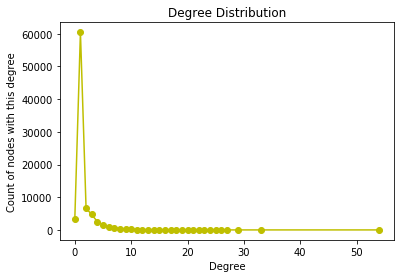

In [24]:
# --------------------------------------------------------
# Degree Distribution of posts+comments graph
# --------------------------------------------------------

print(nx.info(G))

degrees = nx.degree(G)

deg_list = [b for (a,b) in degrees]
unique_degrees = list(set(deg_list))
count_degrees = [deg_list.count(a) for a in unique_degrees]
print("Highest Degrees is ----> ", max(unique_degrees))
print("Nodes with highest degree ----> ", [a for (a,b) in degrees if b == max(unique_degrees)])

sorted_degrees = list(degrees)[:]
sorted_degrees.sort(key = lambda x: x[1])

print("Postids with highest degrees")
print("{0:15s} | {1:5s} ".format("Postid/Commentid", "Degree"))
print("------------------------------------------------")
for x in sorted_degrees[-10:]:
    print("{0:16d} | {1:5d} ".format(x[0], x[1]))

plt.plot(unique_degrees, count_degrees, 'yo-') 
plt.xlabel("Degree")
plt.ylabel("Count of nodes with this degree")
plt.title("Degree Distribution")
plt.show()

In [25]:
# --------------------------------------------------------
# Significant posts / comments -- ANSWER TO QUESTION 1
# --------------------------------------------------------

posts_list = [str(post) for (post, degree) in sorted_degrees[-10:]]
degrees = [degree for (post, degree) in sorted_degrees[-10:]]

dict = {}
for index in range(len(posts_list)):
    dict[posts_list[index]] = degrees[index]

data = df_posts[df_posts.Id.isin(posts_list)]
data


,Title,Id,PostTypeId,ParentId,AcceptedAnswerId,Score,OwnerUserId,Year
12,K-Means clustering for mixed numeric and categ...,22,1,None,NaN,131,97,2014
44,Why Is Overfitting Bad in Machine Learning?,61,1,None,NaN,49,158,2014
128,Publicly Available Datasets,155,1,None,NaN,165,227,2014
612,Best python library for neural networks,694,1,None,NaN,131,989,2014
1908,How to deal with version control of large amou...,5178,1,None,NaN,46,8320,2015
14416,Compare two topic modelling sets,23736,1,None,NaN,4,33838,2017
15453,None,25208,2,25206,NaN,0,40853,2017
16531,How to set the number of neurons and layers in...,26597,1,None,NaN,25,39854,2018
21671,"What to report in the build model, asses model...",33265,1,None,NaN,3,26019,2018
27670,Data science related funny quotes,42621,1,None,NaN,35,28175,2018


In [26]:
# --------------------------------------------------------
# Strongly connected components
# --------------------------------------------------------

x = [len(c) for c in sorted(nx.strongly_connected_components(G), key=len, reverse=True)]
print("Max is ----> ", max(x))
print("Min is ----> ", min(x))
print(x)

Max is ---->  2
Min is ---->  1
[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

# USERS 

In [27]:
# --------------------------------------------------------
# Make user graph nodelist
# --------------------------------------------------------

user_node_list = set()

for key in post_dict:
    user_node_list.add(post_dict[key])

user_node_list = list(user_node_list)
print(len(user_node_list))

13837


In [28]:
# --------------------------------------------------------
# Make user graph edgelist
# --------------------------------------------------------

user_edge_list = []

# --------------------------------------------------------
# Using postlinks
# --------------------------------------------------------

for item in posts_edge_list:

    if ( (item[0] in post_dict) and (item[1] in post_dict) ):
        tup = (post_dict[item[0]], post_dict[item[1]])
        user_edge_list.append(tup)
    
print(len(user_edge_list))

# --------------------------------------------------------
# Using comments
# --------------------------------------------------------

for comment in list_of_comment_nodes:
  
    if int(comment.PostId) in post_dict:
        cid = int(comment.UserId) # User that created the comment        
        pid = post_dict[int(comment.PostId)] # User that created the post that is being commented on
        tup = (cid, pid)
        user_edge_list.append(tup)
        
print(len(user_edge_list))

# --------------------------------------------------------
# Using answers to questions
# --------------------------------------------------------

for post in list_of_posts_nodes:
    
    if post.PostTypeID == "2": # Only the answers
        if ( (post.OwnerUserId != None) and (post.ParentID != None) ):
            if int(post.ParentID) in post_dict:
                aid = int(post.OwnerUserId)
                pid = post_dict[int(post.ParentID)]
            tup = (aid, pid)
            user_edge_list.append(tup)
        
print(len(user_edge_list))


22121
63509
84390


In [29]:
# --------------------------------------------------------
# Create graph of users
# --------------------------------------------------------

UG = nx.MultiDiGraph()

print("Number of nodes ----> ", UG.order())
print("Number of edges ----> ", UG.size())
print(len(user_node_list))
print(len(user_edge_list))


# Add Nodes
UG.add_nodes_from(user_node_list)

# Add Edges
for edge in user_edge_list:    
    UG.add_edge(edge[0], edge[1])

print("Number of nodes ----> ", UG.order())
print("Number of edges ----> ", UG.size())

Number of nodes ---->  0
Number of edges ---->  0
13837
84390
Number of nodes ---->  15056
Number of edges ---->  84390


Name: 
Type: MultiDiGraph
Number of nodes: 15056
Number of edges: 84390
Average in degree:   5.6051
Average out degree:   5.6051
Highest Degrees is ---->  2778
Nodes with highest degree ---->  [836]
UserId with highest degrees
UserId | Degree 
----------------------------------
 11097 |   793 
 35644 |   848 
 14904 |   854 
 29587 |  1093 
  8820 |  1174 
   924 |  1569 
 45264 |  1577 
   381 |  1999 
 28175 |  2298 
   836 |  2778 


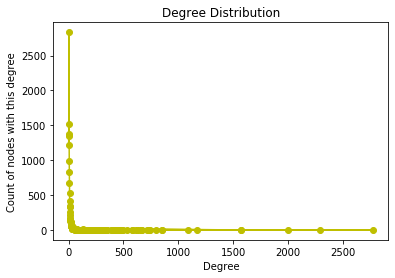

In [30]:
# --------------------------------------------------------
# Degree Distribution of users graph
# --------------------------------------------------------

print(nx.info(UG))

degrees = nx.degree(UG)

deg_list = [b for (a,b) in degrees]
unique_degrees = list(set(deg_list))
count_degrees = [deg_list.count(a) for a in unique_degrees]
print("Highest Degrees is ----> ", max(unique_degrees))
print("Nodes with highest degree ----> ", [a for (a,b) in degrees if b == max(unique_degrees)])

sorted_degrees = list(degrees)[:]
sorted_degrees.sort(key = lambda x: x[1])

top10_highest_degrees = sorted_degrees[-10:]

print("UserId with highest degrees")
print("{0:5s} | {1:5s} ".format("UserId", "Degree"))
print("----------------------------------")
for x in sorted_degrees[-10:]:
    print("{0:6d} | {1:5d} ".format(x[0], x[1]))

plt.plot(unique_degrees, count_degrees, 'yo-') 
plt.xlabel("Degree")
plt.ylabel("Count of nodes with this degree")
plt.title("Degree Distribution")
plt.show()

# What is the reputation of these users with the highest degrees?

In [31]:
print("Reputation of the UserIds with highest degrees")
print("{0:5s} | {1:5s} | {2}".format("UserId", "Degree", "Reputation"))
print("----------------------------------")

for user in top10_highest_degrees:
    query_user = user[0]
    query = 'select * from users where id = {0}'.format(query_user)
    
    cursor.execute(query)
    answer = cursor.fetchall()
    reputation = answer[0][1]
    
    print("{0:6} | {1:6} | {2:5}".format(user[0], user[1], reputation))

Reputation of the UserIds with highest degrees
UserId | Degree | Reputation
----------------------------------
 11097 |    793 | 5798 
 35644 |    848 | 1577 
 14904 |    854 | 6995 
 29587 |   1093 | 5782 
  8820 |   1174 | 7157 
   924 |   1569 | 5971 
 45264 |   1577 | 8181 
   381 |   1999 | 8881 
 28175 |   2298 | 8710 
   836 |   2778 | 18824


In [32]:
# --------------------------------------------------------
# Strongly connected components -- Answer to question 2
# --------------------------------------------------------

from collections import Counter

x = [len(c) for c in sorted(nx.strongly_connected_components(UG), key=len, reverse=True)]
print("Max is ----> ", max(x))
print("Min is ----> ", min(x))

print(Counter(x))

Max is ---->  5360
Min is ---->  1
Counter({1: 9259, 2: 175, 3: 21, 4: 6, 5360: 1})


In [33]:
users = [836, 381, 45264, 8820, 14904, 2452, 11097, 29587, 1330, 9420, 35644, 924, 28175]
for user in users:
    print(user in UG)

True
True
True
True
True
True
True
True
True
True
True
True
True


# How well connected are these users? How well connected are their neighbours?

In [34]:
# --------------------------------------------------------
# Neighbors
# --------------------------------------------------------

print("{0:6} | {1}".format("User", "Average degree of neighbours"))
print("----------------------------------------------------------")
for user in users:
    neighbours = list(UG.neighbors(user))

    sum_degree = 0
    for neighbour in neighbours:
        sum_degree += UG.degree(neighbour)
    
    print("{0:6} | {1:10.2f}".format(user, sum_degree/len(neighbours)))
    

User   | Average degree of neighbours
----------------------------------------------------------
   836 |      57.10
   381 |      40.68
 45264 |      65.26
  8820 |     140.65
 14904 |      83.06
  2452 |      71.18
 11097 |      95.23
 29587 |      45.43
  1330 |      55.36
  9420 |      78.46
 35644 |      72.58
   924 |      51.05
 28175 |      65.72


# Lets go one layer further out and see what the average degrees of all the neighbour's neigbours is. 

In [35]:
# --------------------------------------------------------
# Neighbor's neighbours
# --------------------------------------------------------

print("{0:6} | {1}".format("User", "Average degree of neighbour's neighbours"))
print("----------------------------------------------------------------------")
for user in users:
    sum_degree = 0
    count = 0
    L1_neighbours = list(UG.neighbors(user))    
    for L1_neighbour in L1_neighbours: # Level 1 neigbours
        
        L2_neighbours = list(UG.neighbors(L1_neighbour)) # Level 2 neighbours
        
        count += len(L2_neighbours)
        
        for L2_neighbour in L2_neighbours:
            sum_degree += UG.degree(L2_neighbour)
            
    print("{0:6} | {1:10.2f}".format(user, sum_degree/count))
    

User   | Average degree of neighbour's neighbours
----------------------------------------------------------------------
   836 |     128.03
   381 |     115.23
 45264 |     129.04
  8820 |      87.68
 14904 |     110.69
  2452 |      65.07
 11097 |      89.12
 29587 |     151.29
  1330 |     128.75
  9420 |      80.38
 35644 |      92.32
   924 |     132.81
 28175 |     126.32


In [36]:
# --------------------------------------------------------
# Significant users -- Answer to Question 3
# --------------------------------------------------------

temp = [str(u) for u in users]

data = df_users[df_users["Id"].isin(temp)]
data

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,Location,Views,UpVotes,DownVotes
364,381,8881,2014-06-08T06:51:59.140,Emre,2019-06-27T01:41:39.483,"Silicon Valley, CA, United States",1176,1013,53
20104,28175,8710,2017-01-21T17:02:21.893,Vaalizaadeh,2019-08-31T11:27:24.833,None,1618,4626,0
34958,45264,8181,2018-01-27T10:49:47.773,n1k31t4,2019-08-31T13:14:54.313,Europa,460,232,10
4562,8820,7157,2015-03-25T19:44:36.167,Martin Thoma,2019-08-31T13:51:27.447,"München, Deutschland",1150,87,35
9388,14904,6995,2015-12-21T12:47:57.270,Jan van der Vegt,2019-08-30T12:39:01.913,Amsterdam,683,120,26
1356,2452,6098,2014-07-11T08:54:54.627,Aleksandr Blekh,2019-08-31T21:23:42.897,"Atlanta, GA",408,85,2
871,924,5971,2014-06-17T18:07:02.463,Anony-Mousse,2019-08-31T22:25:39.477,Series of tubes.,542,25,414
6729,11097,5798,2015-08-05T12:46:59.553,Dawny33,2019-08-29T07:56:10.763,"Gurgaon, India",870,2679,117
21494,29587,5782,2017-03-03T13:43:56.900,JahKnows,2019-06-19T23:44:42.960,"Montreal, QC, Canada",1228,154,32
1241,1330,5197,2014-07-03T21:08:29.550,Brian Spiering,2019-09-01T01:34:03.817,"San Francisco, CA, USA",257,79,26
